In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# import Data

df = pd.read_csv("E:/Github Repositories/MeriSkill_Intern/Projects/Sales Data.csv")
df.head(5)

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        185950 non-null  int64  
 1   Order ID          185950 non-null  int64  
 2   Product           185950 non-null  object 
 3   Quantity Ordered  185950 non-null  int64  
 4   Price Each        185950 non-null  float64
 5   Order Date        185950 non-null  object 
 6   Purchase Address  185950 non-null  object 
 7   Month             185950 non-null  int64  
 8   Sales             185950 non-null  float64
 9   City              185950 non-null  object 
 10  Hour              185950 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 15.6+ MB


## Checking For Duplicates

In [4]:
df.duplicated().sum()

0

**Checking Data Types and missing values**

In [5]:
df['Postal Code'].isna().sum()

KeyError: 'Postal Code'

**Filling the missing values with 0**

In [6]:
df['Postal Code'].fillna(0, inplace=True)

KeyError: 'Postal Code'

In [7]:
df['Postal Code'] = df['Postal Code'].astype(int)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        185950 non-null  int64  
 1   Order ID          185950 non-null  int64  
 2   Product           185950 non-null  object 
 3   Quantity Ordered  185950 non-null  int64  
 4   Price Each        185950 non-null  float64
 5   Order Date        185950 non-null  object 
 6   Purchase Address  185950 non-null  object 
 7   Month             185950 non-null  int64  
 8   Sales             185950 non-null  float64
 9   City              185950 non-null  object 
 10  Hour              185950 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 15.6+ MB


## Descriptive Statistics

In [8]:
df.describe()

,Unnamed: 0,Order ID,Quantity Ordered,Price Each,Month,Sales,Hour
count,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000
mean,8340.388475,230417.569379,1.124383,184.399735,7.059140,185.490917,14.413305
std,5450.554093,51512.737110,0.442793,332.731330,3.502996,332.919771,5.423416
min,0.000000,141234.000000,1.000000,2.990000,1.000000,2.990000,0.000000
25%,3894.000000,185831.250000,1.000000,11.950000,4.000000,11.950000,11.000000
50%,7786.000000,230367.500000,1.000000,14.950000,7.000000,14.950000,15.000000
75%,11872.000000,275035.750000,1.000000,150.000000,10.000000,150.000000,19.000000
max,25116.000000,319670.000000,9.000000,1700.000000,12.000000,3400.000000,23.000000


# Data Cleaning 

### Checking for Duplicates


In [9]:
if df.duplicated().sum() > 0:
    print("Duplicates are present in the data.")
else:
    print("No duplicates Found.")

No duplicates Found.


In [10]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
185945    False
185946    False
185947    False
185948    False
185949    False
Length: 185950, dtype: bool

# Exploratory Data Analysis

## Customer Analysis

### Customer Segmentation

In [11]:
df.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


In [12]:
types_of_customers = df['Segment'].unique()
types_of_customers

KeyError: 'Segment'

In [13]:
number_of_customers = df['Segment'].value_counts().reset_index()
number_of_customers = number_of_customers.rename(columns={"Segment": "Customer Type", "count":"Total Customer"})
number_of_customers

KeyError: 'Segment'

In [14]:
# Plotting in a PIE Chart

plt.pie(number_of_customers['Total Customer'], labels=number_of_customers['Customer Type'], autopct='%1.1f%%')
plt.title("Distribution of Customers")
plt.show()

NameError: name 'number_of_customers' is not defined

#### Customers and Sales

In [15]:
sales_by_customers = df.groupby('Segment')['Sales'].sum().reset_index()
sales_by_customers = sales_by_customers.rename(columns={"Segment":"Customer Type", "Sales":"Total Sales"})
sales_by_customers

KeyError: 'Segment'

In [16]:
# Bar graph

plt.bar(sales_by_customers['Customer Type'], sales_by_customers['Total Sales'])
plt.title("Sales Distribution by Customers")
plt.show()

NameError: name 'sales_by_customers' is not defined

## Customer Loyalty


In [18]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [19]:
customer_order_freq = df.groupby(['Customer ID', 'Customer Name', 'Segment'])['Order ID'].count().reset_index()
customer_order_freq = customer_order_freq.rename(columns={"Order ID":"Total Orders"})

# Identify Repeat Customers 
repeat_customers = customer_order_freq[customer_order_freq['Total Orders'] >= 1]

# Sorted repeat Orders
sorted_repeat_customers = repeat_customers.sort_values(by='Total Orders', ascending=False)

print(sorted_repeat_customers.head(10).reset_index(drop=True))

  Customer ID        Customer Name      Segment  Total Orders
0    WB-21850        William Brown     Consumer            35
1    PP-18955           Paul Prost  Home Office            34
2    MA-17560         Matt Abelman  Home Office            34
3    JL-15835             John Lee     Consumer            33
4    CK-12205  Chloris Kastensmidt     Consumer            32
5    SV-20365          Seth Vernon     Consumer            32
6    JD-15895     Jonathan Doherty    Corporate            32
7    AP-10915       Arthur Prichep     Consumer            31
8    ZC-21910     Zuschuss Carroll     Consumer            31
9    EP-13915           Emily Phan     Consumer            31


In [20]:
# Group Data based on: Customer Name, Customer ID and Sales

customer_sales = df.groupby(['Customer ID', 'Customer Name'])['Sales'].sum().reset_index()

# Sort in Descending order

top_spenders = customer_sales.sort_values(by='Sales', ascending=False)

print(top_spenders.head(10).reset_index(drop=True))

  Customer ID       Customer Name      Sales
0    SM-20320         Sean Miller  25043.050
1    TC-20980        Tamara Chand  19052.218
2    RB-19360        Raymond Buch  15117.339
3    TA-21385        Tom Ashbrook  14595.620
4    AB-10105       Adrian Barton  14473.571
5    KL-16645        Ken Lonsdale  14175.229
6    SC-20095        Sanjit Chand  14142.334
7    HL-15040        Hunter Lopez  12873.298
8    SE-20110        Sanjit Engle  12209.438
9    CC-12370  Christopher Conant  12129.072


### Mode of Shipping

In [21]:
# sort values in Ship mode columns in a series

type_of_shipping = df['Ship Mode'].unique()
print(type_of_shipping)

['Second Class' 'Standard Class' 'First Class' 'Same Day']


In [22]:
# Frequeny Use of Ship mode

shipping_mode = df['Ship Mode'].value_counts().reset_index()
shipping_mode = shipping_mode.rename(columns={"Ship Mode":"Mode of Shipment", "count":"Use Frequency"})

shipping_mode

,Mode of Shipment,Use Frequency
0,Standard Class,5859
1,Second Class,1902
2,First Class,1501
3,Same Day,538


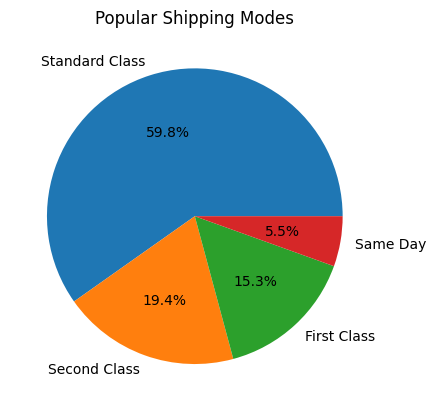

In [23]:
# pie Chart

plt.pie(shipping_mode['Use Frequency'], labels=shipping_mode['Mode of Shipment'], autopct='%1.1f%%')
plt.title("Popular Shipping Modes")
plt.show()

## Graphical Analysis

In [24]:
# Customers by State

state = df['State'].value_counts().reset_index()
state = state.rename(columns={"index":"State", "State":"Number of Customers"})

state.head(3)

,Number of Customers,count
0,California,1946
1,New York,1097
2,Texas,973


In [25]:
# Customers by City 

city = df['City'].value_counts().reset_index()
city = city.rename(columns={"index":"City", "City":"Number of Customers"})

city.head(5)

,Number of Customers,count
0,New York City,891
1,Los Angeles,728
2,Philadelphia,532
3,San Francisco,500
4,Seattle,426


In [26]:
# Sales by State
state_sales = df.groupby('State')['Sales'].sum().reset_index()

# Sort in Descending order

top_state_sales = state_sales.sort_values(by='Sales', ascending=False)

print(top_spenders.head(10).reset_index(drop=True))

  Customer ID       Customer Name      Sales
0    SM-20320         Sean Miller  25043.050
1    TC-20980        Tamara Chand  19052.218
2    RB-19360        Raymond Buch  15117.339
3    TA-21385        Tom Ashbrook  14595.620
4    AB-10105       Adrian Barton  14473.571
5    KL-16645        Ken Lonsdale  14175.229
6    SC-20095        Sanjit Chand  14142.334
7    HL-15040        Hunter Lopez  12873.298
8    SE-20110        Sanjit Engle  12209.438
9    CC-12370  Christopher Conant  12129.072


In [27]:
# Sales by City
city_sales = df.groupby('City')['Sales'].sum().reset_index()

# Sort in Descending order

top_city_sales = city_sales.sort_values(by='Sales', ascending=False)

print(top_spenders.head(10).reset_index(drop=True))

  Customer ID       Customer Name      Sales
0    SM-20320         Sean Miller  25043.050
1    TC-20980        Tamara Chand  19052.218
2    RB-19360        Raymond Buch  15117.339
3    TA-21385        Tom Ashbrook  14595.620
4    AB-10105       Adrian Barton  14473.571
5    KL-16645        Ken Lonsdale  14175.229
6    SC-20095        Sanjit Chand  14142.334
7    HL-15040        Hunter Lopez  12873.298
8    SE-20110        Sanjit Engle  12209.438
9    CC-12370  Christopher Conant  12129.072


## Product Category

In [28]:
df.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62


In [29]:
# Types of Product Category

type_of_product = df['Category'].unique()
print(type_of_product)

['Furniture' 'Office Supplies' 'Technology']


In [30]:
# Group Data by categories

category_count = df.groupby('Category')['Sub-Category'].nunique().reset_index()

# Sort Values by Sub-Category
category_count = category_count.sort_values(by='Sub-Category', ascending=False)

print(category_count.head(5).reset_index(drop=True))

          Category  Sub-Category
0  Office Supplies             9
1        Furniture             4
2       Technology             4


In [31]:
# Sales Per each Category

Sales_by_category = df.groupby('Category')['Sales'].sum().reset_index()

# Sort Values by Sub-Category
Sales_by_category = Sales_by_category.sort_values(by='Sales', ascending=False)

print(Sales_by_category.head(5).reset_index(drop=True))

          Category        Sales
0       Technology  827455.8730
1        Furniture  728658.5757
2  Office Supplies  705422.3340


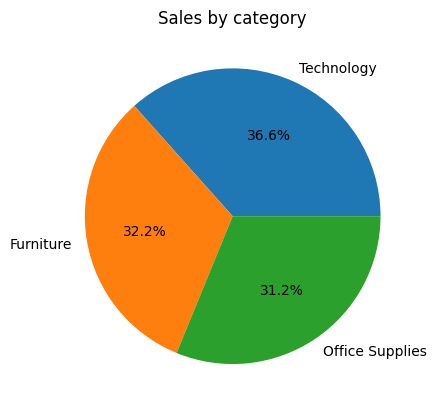

In [32]:
# pie Chart

plt.pie(Sales_by_category['Sales'], labels=Sales_by_category['Category'], autopct='%1.1f%%')
plt.title("Sales by category")
plt.show()

In [33]:
# Group Data by Sub-categories

sub_category_count = df.groupby('Sub-Category')['Sales'].sum().reset_index()

# Sort Values by Sub-Category
top_sub_category_count = sub_category_count.sort_values(by='Sales', ascending=True)

print(top_sub_category_count.head(5).reset_index(drop=True))

  Sub-Category      Sales
0    Fasteners   3001.960
1       Labels  12347.726
2    Envelopes  16128.046
3          Art  26705.410
4     Supplies  46420.308


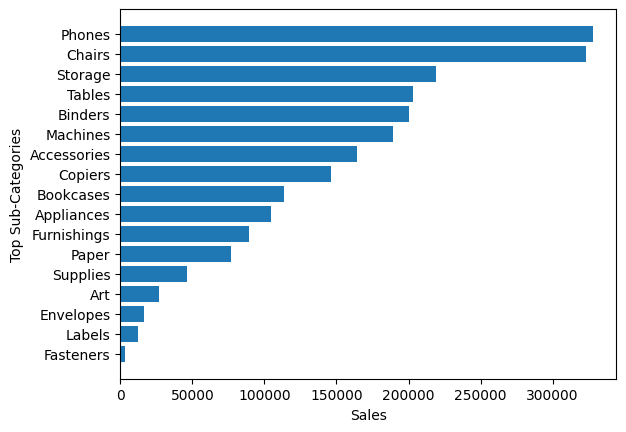

In [34]:
plt.barh(top_sub_category_count['Sub-Category'], top_sub_category_count['Sales'])
plt.xlabel("Sales")
plt.ylabel("Top Sub-Categories")
plt.show()

# Sales

In [35]:
df.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62


In [36]:
# Convert Date to Datetime object

df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)

yearly_sales = df.groupby(df['Order Date'].dt.year)['Sales'].sum().reset_index()

yearly_sales = yearly_sales.rename(columns={'Order Date':"Year", "Date":"Total Sales"})

yearly_sales

,Year,Sales
0,2015,479856.2081
1,2016,459436.0054
2,2017,600192.5500
3,2018,722052.0192


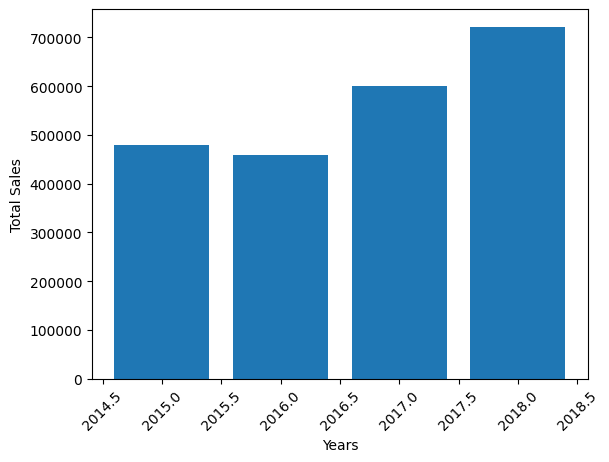

In [37]:
# Plotting the bar Chart

plt.bar(yearly_sales['Year'], yearly_sales['Sales'])
plt.xlabel("Years")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()

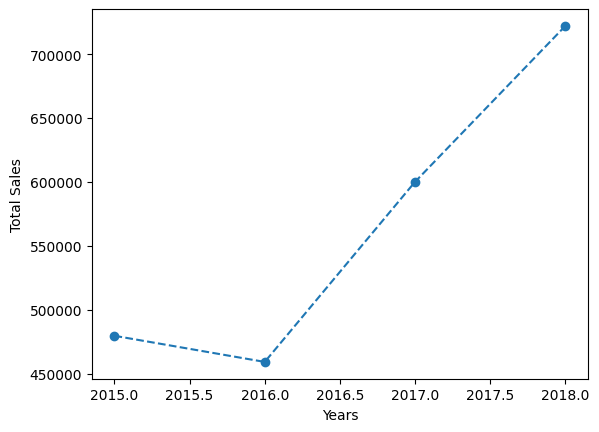

In [38]:
# Plotting the line Chart

plt.plot(yearly_sales['Year'], yearly_sales['Sales'], marker='o', linestyle="--")

#Label
plt.xlabel("Years")
plt.ylabel("Total Sales")
plt.show()

## Quarterly Sales

In [39]:
# Convert Order Date Column to datetime object

df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)

# Filter Data according to Year

year_sale = df[df['Order Date'].dt.year == 2018]

# Calculate Quarterly Sales of Year 2018

quarterly_sale = year_sale.resample("Q", on='Order Date')['Sales'].sum().reset_index()

quarterly_sale = quarterly_sale.rename(columns={'Order Date': "Quarter", 'Sales':'Total Sales'})

print("These are the quarterly sales of 2018")
quarterly_sale

These are the quarterly sales of 2018


,Quarter,Total Sales
0,2018-03-31,122260.8842
1,2018-06-30,127558.6200
2,2018-09-30,193815.8400
3,2018-12-31,278416.6750


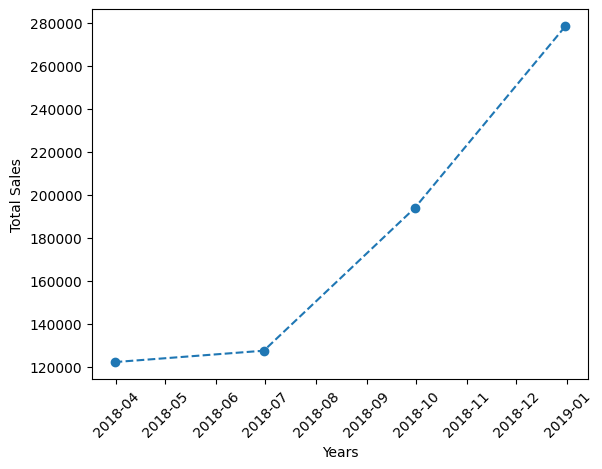

In [40]:
# Plotting the line Chart

plt.plot(quarterly_sale['Quarter'], quarterly_sale['Total Sales'], marker='o', linestyle="--")

#Label
plt.xlabel("Years")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()

## Monthly Sales Trend of the Year

In [41]:
# Convert Order Date Column to datetime object

df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)

# Filter Data according to Year
year_sale = df[df['Order Date'].dt.year == 2018]


# Calculate Monthly Sales of Year 2018
monthly_sale = year_sale.resample("M", on='Order Date')['Sales'].sum()


# Rename the columns
monthly_sale = monthly_sale.reset_index()
monthly_sale = monthly_sale.rename(columns={'Order Date': "Month", 'Sales':'Total Monthly Sales'})

print("These are the monthly sales of 2018")
monthly_sale

These are the monthly sales of 2018


,Month,Total Monthly Sales
0,2018-01-31,43476.4740
1,2018-02-28,19920.9974
2,2018-03-31,58863.4128
3,2018-04-30,35541.9101
4,2018-05-31,43825.9822
5,2018-06-30,48190.7277
6,2018-07-31,44825.1040
7,2018-08-31,62837.8480
8,2018-09-30,86152.8880
9,2018-10-31,77448.1312


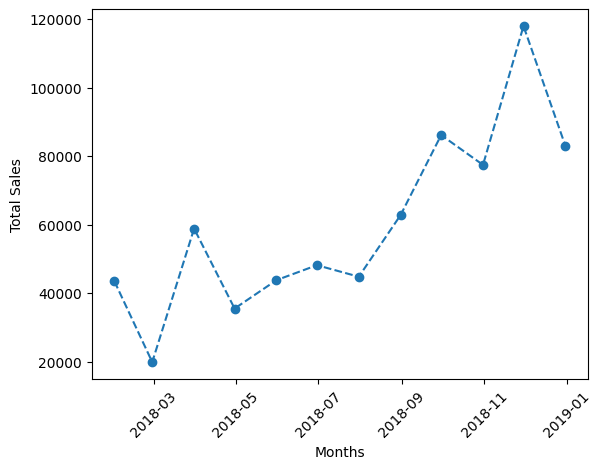

In [42]:
# Plotting the line Chart

plt.plot(monthly_sale['Month'], monthly_sale['Total Monthly Sales'], marker='o', linestyle="--")

#Label
plt.xlabel("Months")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()